In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")
    
from models.trainer import *
import numpy as np
import torch
from models.spectro_transformer import *
from data.dataset import *
from torch.utils.data import DataLoader, Dataset, random_split, TensorDataset

/home/hutiany4/miniconda3/envs/a2a-music-gen/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
wdir = os.getcwd().replace("\\", "/") + "/.."
processed_dir = f"{wdir}/data/processed/musicnet"
model_dir = f"{wdir}/models/AST.pt"

spec_dataset = SpectrogramDataset(
    f"{processed_dir}/train_data", split_ratio=0.8
)

token_size = spec_dataset[0][0].shape[0]
seq_size = spec_dataset[0][0].shape[1]
out_size = spec_dataset[0][1].shape[1]

train_set, val_set = random_split(spec_dataset, [0.8, 0.2])

train_loader = DataLoader(train_set, batch_size=5, shuffle=True)
val_loader = DataLoader(val_set, batch_size=5, shuffle=True)

for x, y, _ in train_loader:
    batch_size, token_len, seq_len = x.shape[0], x.shape[1], x.shape[2]
    print(f"token_len: {token_len}, seq_len: {seq_len}")
    break

token_len: 201, seq_len: 744


In [3]:
configuration = ASTConfig()
configuration.num_mel_bins = token_len # dimension size of frequency
configuration.max_length = seq_len      # dimension size of input time length
configuration.hidden_dropout_prob = 0.2
configuration.hidden_size = 120
configuration.num_hidden_layers = 1

trainer = AST_trainer()
trainer.set_dataloaders(train_loader=train_loader, val_loader=val_loader, test_loader=None)
trainer.create_model(configuration)
history = trainer.train(1e-3, 1e-3, 10)
torch.save(trainer.model, model_dir)

Validation epoch 0: 100%|██████████| 13/13 [00:18<00:00,  1.45s/it]



Epoch: 0 	Training Loss: 28.9991 	Validation Loss: 39.1201
	 	Training Accuracy: 29.03% 	Validation Accuracy: 33.91%


Validation epoch 1: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]



Epoch: 1 	Training Loss: 28.9372 	Validation Loss: 39.1070
	 	Training Accuracy: 33.44% 	Validation Accuracy: 34.34%


Validation epoch 2: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]



Epoch: 2 	Training Loss: 28.9291 	Validation Loss: 39.0908
	 	Training Accuracy: 33.39% 	Validation Accuracy: 34.07%


Validation epoch 3: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]



Epoch: 3 	Training Loss: 28.9224 	Validation Loss: 39.0949
	 	Training Accuracy: 33.55% 	Validation Accuracy: 34.20%


Validation epoch 4: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]



Epoch: 4 	Training Loss: 28.8747 	Validation Loss: 38.9702
	 	Training Accuracy: 32.33% 	Validation Accuracy: 32.47%


Validation epoch 5: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]



Epoch: 5 	Training Loss: 28.8189 	Validation Loss: 38.9459
	 	Training Accuracy: 31.48% 	Validation Accuracy: 34.14%


Validation epoch 6: 100%|██████████| 13/13 [00:18<00:00,  1.42s/it]



Epoch: 6 	Training Loss: 28.8107 	Validation Loss: 38.9347
	 	Training Accuracy: 31.13% 	Validation Accuracy: 34.44%


Validation epoch 7: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]



Epoch: 7 	Training Loss: 28.7412 	Validation Loss: 38.8577
	 	Training Accuracy: 30.67% 	Validation Accuracy: 30.86%


Validation epoch 8: 100%|██████████| 13/13 [00:18<00:00,  1.42s/it]



Epoch: 8 	Training Loss: 28.7097 	Validation Loss: 38.8301
	 	Training Accuracy: 31.56% 	Validation Accuracy: 33.44%


Validation epoch 9: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]


Epoch: 9 	Training Loss: 28.6912 	Validation Loss: 38.8692
	 	Training Accuracy: 31.07% 	Validation Accuracy: 32.39%


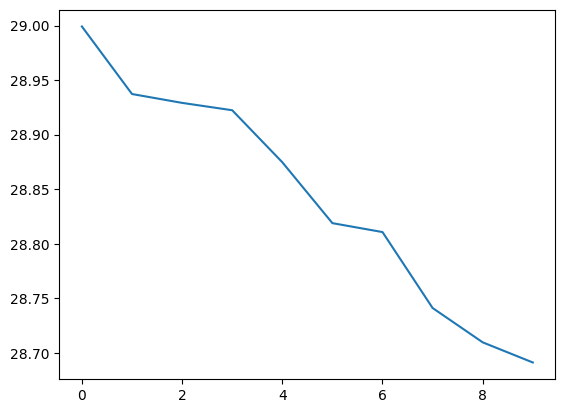

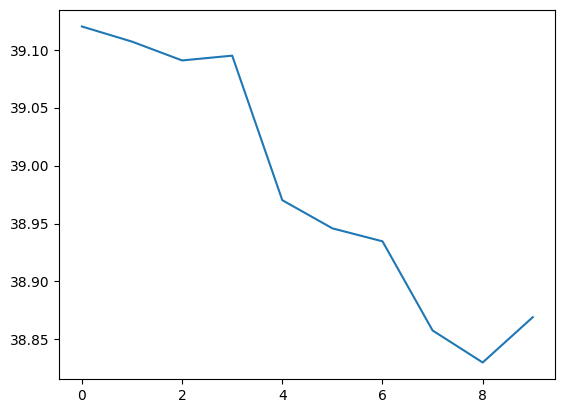

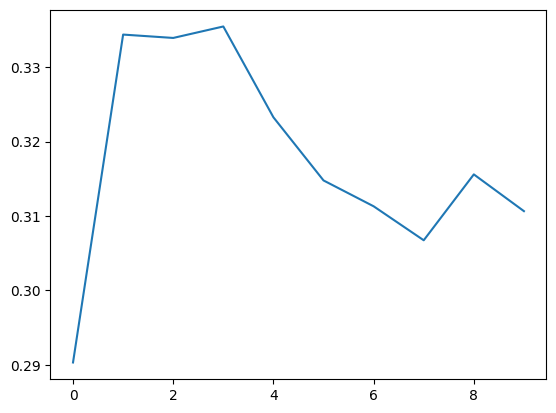

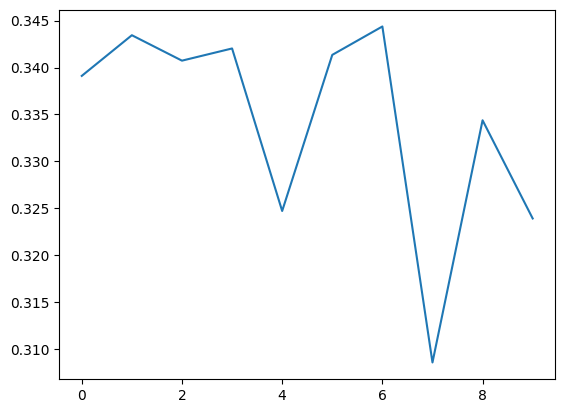

In [19]:
import matplotlib.pyplot as plt
import numpy as np

val_loss = history["val_loss"].to_list()
train_loss = history["train_loss"].to_list()
val_acc = history["val_acc"].to_list()
train_acc = history["train_acc"].to_list()
x_axis = np.arange(history.shape[0])

for i in range(len(train_acc)):
    train_acc[i] = train_acc[i].cpu()
    val_acc[i] = val_acc[i].cpu()
    

fig = plt.figure(0)
plt.plot(x_axis, train_loss)
fig = plt.figure(1)
plt.plot(x_axis, val_loss)
fig = plt.figure(2)
plt.plot(x_axis, train_acc)
fig = plt.figure(3)
plt.plot(x_axis, val_acc)
plt.show()